# Example of the first model. What's better for each Region?, Data classifing. Map, Team, Won. 
## Classifier

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

from pyexpat import features
# Scikit-Learn
## Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
## Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
## Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

EMEA = pd.read_csv("D:/python_project/Valorant/First model csv/EMEA_test1.csv")
AMERICAS = pd.read_csv("D:/python_project/Valorant/First model csv/AMERICAS_test1.csv")
PACIFIC = pd.read_csv("D:/python_project/Valorant/First model csv/PACIFIC_test1.csv")

## Regional

### EMEA

In [6]:
EMEA.isna().sum()

map             0
t1_team_name    0
t2_team_name    0
Won             0
dtype: int64

In [8]:
target = "Won"
features = list(EMEA.columns.values)
features.remove(target)
X = EMEA[features]
y = EMEA[target]
X,y

(          map   t1_team_name   t2_team_name
 0       Split         FNATIC  Team Heretics
 1      Icebox  Team Heretics    Team Liquid
 2      Ascent    Team Liquid  Team Heretics
 3       Haven  Team Heretics    Team Liquid
 4    Fracture    Team Liquid    BBL Esports
 ..        ...            ...            ...
 99   Fracture   Karmine Corp    BBL Esports
 100     Pearl   Karmine Corp    BBL Esports
 101    Icebox    BBL Esports   Karmine Corp
 102     Lotus  Team Vitality         GIANTX
 103     Split  Team Vitality         GIANTX
 
 [104 rows x 3 columns],
 0      1
 1      1
 2      0
 3      1
 4      1
       ..
 99     0
 100    0
 101    0
 102    1
 103    1
 Name: Won, Length: 104, dtype: int64)

In [9]:
## Good proportion, Balanced.
y.value_counts(normalize = True)

Won
1    0.509615
0    0.490385
Name: proportion, dtype: float64

In [13]:
X = pd.get_dummies(X)
X.head()

,map_Ascent,map_Fracture,map_Haven,map_Icebox,map_Lotus,map_Pearl,map_Split,t1_team_name_Apeks,t1_team_name_BBL Esports,t1_team_name_FNATIC,...,t2_team_name_FNATIC,t2_team_name_FUT Esports,t2_team_name_GIANTX,t2_team_name_Gentle Mates,t2_team_name_KOI,t2_team_name_Karmine Corp,t2_team_name_Natus Vincere,t2_team_name_Team Heretics,t2_team_name_Team Liquid,t2_team_name_Team Vitality
0,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


AttributeError: 'Axes' object has no attribute 'plt'

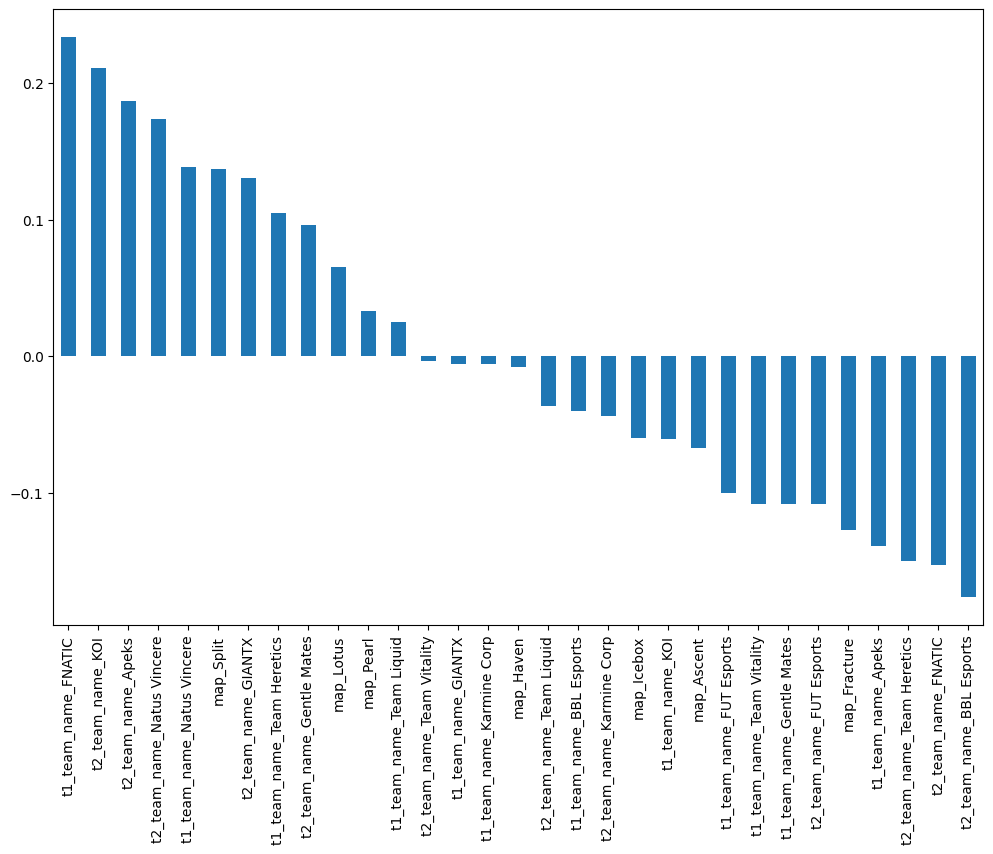

In [14]:
plt.figure(figsize=(12,8))
X.corrwith(y).sort_values(ascending = False).plot(kind = "bar").plt(figsize=(10,4))

#### Already can see which teams are more difficult to predict!

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Selection

In [16]:
# Model selection, classifier.
models = {
    "Logistic regression": LogisticRegression(random_state = 1),
    "Decision tree": DecisionTreeClassifier(random_state = 1),
    "Random fores": RandomForestClassifier(random_state = 1),
    "Gradient boosting": GradientBoostingClassifier(random_state = 1)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

## First report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.44      0.40      0.42        10

    accuracy                           0.48        21
   macro avg       0.47      0.47      0.47        21
weighted avg       0.47      0.48      0.47        21



In [17]:
## Looking at the scores.
model_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    scores = pd.DataFrame([
    {
        "model_name": name,
        "f1": round(f1_score(y_test, (y_pred := model.fit(X_train, y_train).predict(X_test))), 2),
        "precision": round(precision_score(y_test, y_pred), 2),
        "accuracy": round(accuracy_score(y_test, y_pred), 2),
        "recall": round(recall_score(y_test, y_pred), 2)
    }
for name, model in models.items()
    ])
scores

,model_name,f1,precision,accuracy,recall
0,Logistic regression,0.76,0.73,0.76,0.8
1,Decision tree,0.22,0.25,0.33,0.2
2,Random fores,0.53,0.56,0.57,0.5
3,Gradient boosting,0.42,0.44,0.48,0.4


#### In this case Logistic regression is the one with overall better metrics, but it might depend on the dataset. 